In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# os.getcwd()

In [3]:
df_original = pd.read_csv("SYB65_1_202209_Population, Surface Area and Density.csv", header = 1)
df = df_original.copy()
# df

In [30]:
# df_original

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),"6,985.60",NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,"3,514.41",NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,"3,471.20",NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.2,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27.1,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
7868,716,Zimbabwe,2022,Population mid-year estimates for females (mil...,8.61,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7869,716,Zimbabwe,2022,Sex ratio (males per 100 females),89.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7870,716,Zimbabwe,2022,Population aged 0 to 14 years old (percentage),40.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7871,716,Zimbabwe,2022,Population aged 60+ years old (percentage),4.8,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [4]:
# list(df.columns)

In [5]:
## Drop unused columns

df = df.drop(['Region/Country/Area', 'Footnotes', 'Source'], axis=1)
# df

In [6]:
df = df.rename(columns = {"Unnamed: 1": "Area"})
# df

In [7]:
# df.sample(30)

In [8]:
# df["Series"].unique()

In [9]:
## Change the values in Series column so that they are more easily readable

map_series = {"Population mid-year estimates (millions)": "Total Population",
              "Population mid-year estimates for males (millions)": "Male Population",
              "Population mid-year estimates for females (millions)": "Female Population",
              "Population aged 0 to 14 years old (percentage)": "Age 0 to 14",
              "Population aged 60+ years old (percentage)": "Age 60 Plus",
              "Sex ratio (males per 100 females)": "Males per 100 Females",
              "Population density": "Population Density",
              "Surface area (thousand km2)": "Surface Area"}

df["Series"] = df["Series"].apply(lambda x: map_series[x])
# df

In [10]:
# list(df["Area"].unique())

In [11]:
## Merge main dataframe with dataframe that contains continent assigment for each country

df_country_continent = pd.read_csv("country_continent.csv", sep=";", encoding="utf-8")
df = pd.merge(df, df_country_continent, how="left", on="Area")

# df[df["Continent"].isnull().values]["Area"].unique()

In [12]:
# df[df["Area"] == "Côte d’Ivoire"]

In [13]:
## Change the country names to more simple names

map_area = {"Total, all countries or areas": "All Countries or Areas",
            "Dem. Rep. of the Congo": "D.R. Congo",
            "Lao People's Dem. Rep.": "Laos",
            "Republic of Moldova": "Moldova",
            "United Rep. of Tanzania": "Tanzania",
            "Bolivia (Plurin. State of)": "Bolivia",
            "China, Hong Kong SAR": "Hong Kong",
            "China, Macao SAR": "Macao",
            "Dem. People's Rep. Korea": "North Korea",
            "Iran (Islamic Republic of)": "Iran",
            "Micronesia (Fed. States of)": "Federated States of Micronesia",
            "Russian Federation": "Russia",
            "Saint Martin (French part)": "French Saint Martin",
            "Sint Maarten (Dutch part)": "Dutch Sint Maarten",
            "State of Palestine": "Palestine",
            "Syrian Arab Republic": "Syria",
            "Türkiye": "Turkey",
            "United States of America": "U.S.",
            "United States Virgin Islands": "U.S. Virgin Islands",
            "Venezuela (Boliv. Rep. of)": "Venezuela",
            "Viet Nam" : "Vietnam",
            "United Kingdom" : "U.K.",
            "Falkland Islands (Malvinas)": "Falkland Islands"
            }
df = df.replace({"Area": map_area})

df["Area"] = df["Area"].str.replace("&", "and")

In [14]:
# list(df["Area"].unique())

In [15]:
## Assign Area Category for each Area

continent_group = ["Africa", "Asia", "South America", "Oceania", "Europe"]

region_group = ["Northern Africa",
              "Sub-Saharan Africa",
              "Eastern Africa",
              "Middle Africa",
              "Southern Africa",
              "Western Africa",               
              "Americas",
              "Northern America",
              "Latin America and the Caribbean",
              "Caribbean",
              "Central America",
              "Central Asia",
              "Eastern Asia",
              "South-central Asia",
              "South-eastern Asia",
              "Southern Asia",
              "Western Asia",
              "Eastern Europe",
              "Northern Europe",
              "Southern Europe",
              "Western Europe",
              "Melanesia",
              "Micronesia",
              "Polynesia",
              "Australia and New Zealand"]

def map_area_category(x):
    result = None
    if x in continent_group:
        result = "CONTINENT"
    elif x in region_group:
        result = "REGION"
    elif x == "All Countries or Areas":
        result = "WORLD"
    else: result = "COUNTRY"
    
    return result

df["Area_Category"] = df["Area"].apply(lambda x: map_area_category(x))

In [16]:
## Fill nul values in Area_Category column with "NOT A COUNTRY"

df["Continent"] = df["Continent"].fillna("NOT A COUNTRY")
# df.sample(30)

In [17]:
df.sample(30)

,Area,Year,Series,Value,Continent,Area_Category
1699,"Bonaire, St. Eustatius and Saba",2022,Age 60 Plus,21.1,North America,COUNTRY
6085,Rwanda,2020,Total Population,13.15,Africa,COUNTRY
286,Northern America,2020,Male Population,185.39,NOT A COUNTRY,REGION
3488,Grenada,2020,Total Population,0.12,North America,COUNTRY
2861,El Salvador,2020,Males per 100 Females,91.0,North America,COUNTRY
2756,Dominican Republic,2010,Males per 100 Females,102.3,North America,COUNTRY
2309,Comoros,2010,Population Density,352.5,Africa,COUNTRY
5138,Myanmar,2020,Age 0 to 14,25.1,Asia,COUNTRY
6325,San Marino,2010,Males per 100 Females,95.9,Europe,COUNTRY
7220,Tunisia,2015,Total Population,11.56,Africa,COUNTRY


In [18]:
df["Area"].unique()

array(['All Countries or Areas', 'Africa', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Latin America and the Caribbean', 'Caribbean',
       'Central America', 'South America', 'Asia', 'Central Asia',
       'Eastern Asia', 'South-central Asia', 'South-eastern Asia',
       'Southern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
       'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'Polynesia', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire, St. Eustatius and Saba',
       'Bos

In [19]:
df.sample(30)

,Area,Year,Series,Value,Continent,Area_Category
4182,Kenya,2015,Surface Area,592,Africa,COUNTRY
75,Northern Africa,2020,Total Population,251.42,NOT A COUNTRY,REGION
6539,Singapore,2015,Total Population,5.65,Asia,COUNTRY
3547,Guam,2015,Surface Area,1,Oceania,COUNTRY
3622,Guinea,2022,Population Density,56.4,Africa,COUNTRY
4059,Jamaica,2015,Males per 100 Females,98.6,North America,COUNTRY
6468,Serbia,2022,Males per 100 Females,92.1,Europe,COUNTRY
4356,Lebanon,2015,Male Population,3.17,Asia,COUNTRY
3638,Guinea-Bissau,2020,Total Population,2.02,Africa,COUNTRY
7831,Zambia,2020,Males per 100 Females,97.4,Africa,COUNTRY


In [20]:
# df[df["Area"] == "Asia"]

In [21]:
## Create North America continent information from its subregions info because the continent info is previously non-existent

df_north_america = df[df["Area"].isin(["Caribbean", "Central America", "Northern America"])]
df_north_america = df_north_america[df_north_america["Series"] == "Total Population"]
df_north_america["Value"] = df_north_america["Value"].astype(float)

df_north_america = df_north_america.groupby(["Year"], as_index=False).sum()
df_north_america["Area"] = "North America"
df_north_america["Area_Category"] = "CONTINENT"
df_north_america["Series"] = "Total Population"
df_north_america["Continent"] = "NOT A COUNTRY"

# df_north_america

In [22]:
# df.shape

In [23]:
## Merge the North America data to main data frame
df = pd.concat([df, df_north_america])
# df.shape

In [24]:
## Fix data types

df["Value"] = df["Value"].str.replace(",", "")

df["Value"] = df["Value"].astype(float)

In [25]:
print("YEAR:")
print(df["Year"].unique())

print("SERIES:")
print(df["Series"].unique())

print("CONTINENT:")
print(df["Continent"].unique())

print("AREA CATEGORY:")
print(df["Area_Category"].unique())

YEAR:
[2010 2015 2020 2022 2017]
SERIES:
['Total Population' 'Male Population' 'Female Population'
 'Males per 100 Females' 'Age 0 to 14' 'Age 60 Plus' 'Population Density'
 'Surface Area']
CONTINENT:
['NOT A COUNTRY' 'Asia' 'Europe' 'Africa' 'Oceania' 'North America'
 'South America']
AREA CATEGORY:
['WORLD' 'CONTINENT' 'REGION' 'COUNTRY']


## Questions to ask, visualizations to build, data to predict:

+ Largest countries in the world, continent, region

+ Smallest countries in the world, continent, region

+ Countries with most unbalanced male/female populations

+ Most densely populated countries in the world, continent, region

+ Countries with most elderly people in the world, continent, region

+ Countries with most young people in the world, continent, region

+ Trends of population globally

+ Trends of population per country (normalized) superimposed

+ Countries and continents with most decreasing/increasing trend in population

+ Countries and continents with most decreasing/increasing trend in percentage of population

+ Countries and continents with most decreasing/increasing young people population trend

+ Countries and continents with most decreasing/increasing elderly people population trend

## Major question:

+ Is the world's population in a declining trend?

+ How many people are born every day in the world / a continent / a country / a region ?

+ How steep is the declining/inclining trend?

+ What are the countries with the largest/smallest population?

+ What are the countries with the highest/lowest population density?

+ What are the countries with the largest/smallest population in a continent?

+ What are the countries with the largest/smallest population in a region?

+ Which countries have the most increase in population?

+ Which countries have the most increase in percentage of population?

+ What is the population trend of my country?

+ Which country has the most imbalanced female/male ratio?

+ Which countries have the largest/smallest population of elderly people in real number and in percentage of population?

+ Which countries have the largest/smallest population of young people in real number and in percentage of population?

+ How are populations distributed among countries?

## Predict:

+ Number of population of a given year

+ Clustering of countries population time series

In [29]:
df.sample(30)

,Area,Year,Series,Value,Continent,Area_Category
1987,Cambodia,2020,Male Population,8.12,Asia,COUNTRY
5655,Panama,2010,Age 60 Plus,9.40,North America,COUNTRY
3719,Honduras,2010,Total Population,8.45,North America,COUNTRY
1240,Aruba,2015,Males per 100 Females,90.20,North America,COUNTRY
5466,North Macedonia,2020,Female Population,1.06,Europe,COUNTRY
3645,Guinea-Bissau,2020,Surface Area,36.00,Africa,COUNTRY
849,Melanesia,2015,Female Population,5.21,NOT A COUNTRY,REGION
1887,Burkina Faso,2010,Population Density,58.90,Africa,COUNTRY
6473,Seychelles,2010,Male Population,0.05,Africa,COUNTRY
6037,Romania,2022,Age 0 to 14,15.90,Europe,COUNTRY


<AxesSubplot:xlabel='Year', ylabel='Value'>

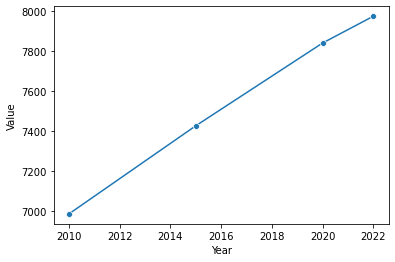

In [33]:
## Create visualization for world population trend

world_total_population = df.query('Area=="All Countries or Areas" & Series=="Total Population"')
sns.lineplot(data = world_total_population, x="Year", y="Value", markers=True, marker="o")

In [45]:
## Create simple prediction using linear regression

model = LinearRegression()
X = world_total_population["Year"]
X = np.array(X).reshape((-1,1))

y = world_total_population["Value"]

In [41]:
y_train

15    7840.95
0     6985.60
7     7426.60
Name: Value, dtype: float64

In [46]:
model.fit(X, y)

LinearRegression()

In [47]:
print(model.intercept_)
print(model.coef_)

-159898.627665706
[83.03244957]


In [49]:
y_predicted = model.predict(X)

In [50]:
pd.DataFrame({"Actual": y, "Predicted": y_predicted})

,Actual,Predicted
0,6985.60,6996.595965
7,7426.60,7411.758213
15,7840.95,7826.920461
23,7975.11,7992.985360


In [52]:

print("Mean Absolute Error:", metrics.mean_absolute_error(y, y_predicted))
print("Mean Squared Error:", metrics.mean_squared_error(y, y_predicted))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y, y_predicted)))

Mean Absolute Error: 14.43566282421034
Mean Squared Error: 214.38658861681716
Root Mean Squared Error: 14.641946203179998


In [57]:
X_future = np.array([2023, 2024, 2025]).reshape((-1,1))

y_predict_future = model.predict(X_future)

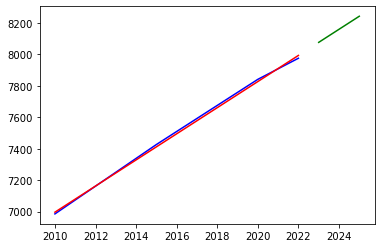

In [58]:
plt.plot(X, y, color="blue")
plt.plot(X, y_predicted, color="red")
plt.plot(X_future, y_predict_future, color="green")
plt.show()

In [60]:
y_predict_future

array([8076.0178098 , 8159.05025937, 8242.08270893])